In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('GoE_Dataset.csv')
df.head()

,ID,Title,Pillar,Intructor,Categories,Difficulty,Difficulty_Num,Duration,Duration_Num,Require_Movement,Require_Movemen_Num,Tags,Source,Type,Audio,Recepie,Text,Video,Visualization
0,14,A Comprehensive Guide to Essential Vitamins an...,Nutrition,NaN,Education,Intermediate,2,6-15 min,3,No,0.0,"Guide, Wellness, Education, Comprehensive, Nut...",Mockup,"Text, Video",0,0,1,1,0
1,122,A Comprehensive Guide to Nutritional Balance,Nutrition,NaN,Education,Intermediate,2,6-15 min,3,No,0.0,"Guide, Wellness, Education, Comprehensive, Nut...",Mockup,"Text, Video",0,0,1,1,0
2,352,A Comprehensive Guide to Nutritional Basics,Nutrition,NaN,Education,Intermediate,2,6-15 min,3,No,0.0,"Guide, Wellness, Education, Comprehensive, Nut...",Mockup,"Text, Video",0,0,1,1,0
3,280,A Comprehensive Guide to Nutritional Essentials,Nutrition,NaN,Education,Intermediate,2,6-15 min,3,No,0.0,"Guide, Wellness, Education, Essentials, Compre...",Mockup,"Text, Video",0,0,1,1,0
4,174,A Comprehensive Guide to Vitamins and Minerals,Nutrition,NaN,Education,Intermediate,2,6-15 min,3,No,0.0,"Guide, Wellness, Education, Comprehensive, Nut...",Mockup,"Text, Video",0,0,1,1,0


In [3]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns', '\n')
print(f'The dataset contains {df.isnull().sum().sum()} missing values', '\n')
print(f'The dataset contains {df.duplicated().sum()} duplicated rows', '\n')

The dataset contains 428 rows and 19 columns 

The dataset contains 828 missing values 

The dataset contains 0 duplicated rows 



# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   428 non-null    int64  
 1   Title                428 non-null    object 
 2   Pillar               428 non-null    object 
 3   Intructor            226 non-null    object 
 4   Categories           375 non-null    object 
 5   Difficulty           396 non-null    object 
 6   Difficulty_Num       428 non-null    int64  
 7   Duration             396 non-null    object 
 8   Duration_Num         428 non-null    int64  
 9   Require_Movement     188 non-null    object 
 10  Require_Movemen_Num  188 non-null    float64
 11  Tags                 399 non-null    object 
 12  Source               428 non-null    object 
 13  Type                 428 non-null    object 
 14  Audio                428 non-null    int64  
 15  Recepie              428 non-null    int

In [5]:
for col in df.select_dtypes(include=np.number).columns:
    if (df[col].isnull().sum() > .5 * df.shape[0]):
        df.drop(col, axis=1, inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

In [6]:
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                428 non-null    int64 
 1   Title             428 non-null    object
 2   Pillar            428 non-null    object
 3   Intructor         428 non-null    object
 4   Categories        428 non-null    object
 5   Difficulty        428 non-null    object
 6   Difficulty_Num    428 non-null    int64 
 7   Duration          428 non-null    object
 8   Duration_Num      428 non-null    int64 
 9   Require_Movement  428 non-null    object
 10  Tags              428 non-null    object
 11  Source            428 non-null    object
 12  Type              428 non-null    object
 13  Audio             428 non-null    int64 
 14  Recepie           428 non-null    int64 
 15  Text              428 non-null    int64 
 16  Video             428 non-null    int64 
 17  Visualization   

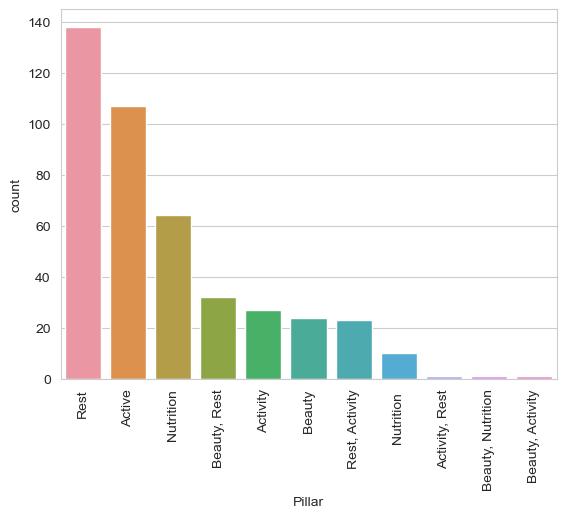

In [21]:
x = df['Pillar'].value_counts().index
sns.countplot(x='Pillar', data=df, order=x)
plt.xticks(rotation=90)
plt.show();

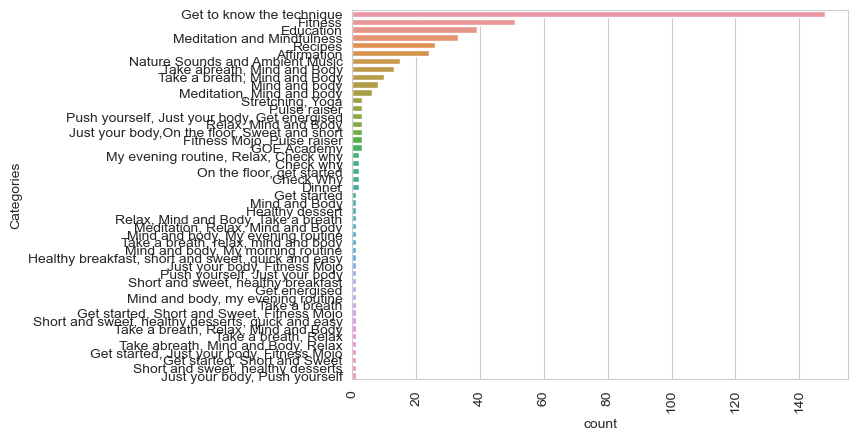

In [23]:
x = df['Categories'].value_counts().index
sns.countplot(y='Categories', data=df, order=x)
plt.xticks(rotation=90)
plt.show();

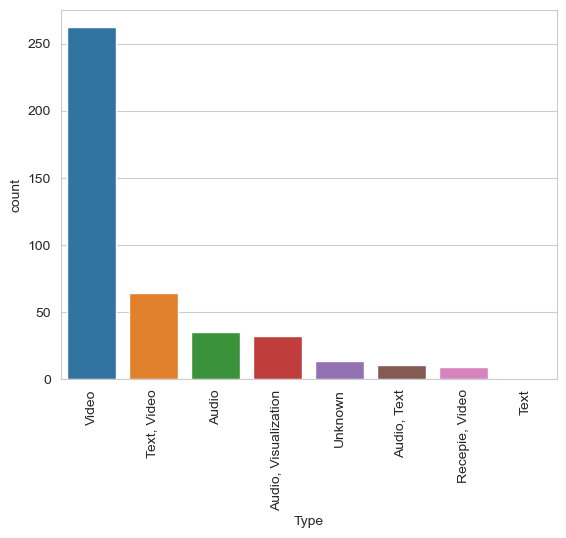

In [25]:
x = df[col].value_counts().index

def countplot(col):
    sns.countplot(x=col, data=df, order=x)
    plt.xticks(rotation=90)
    plt.show();

countplot('Type')

# Latent Dirichlet Allocation (LDA)

* `Latent Dirichlet Allocation (LDA)` is a topic model that generates topics based on word frequency from a set of documents. LDA is particularly useful for finding reasonably accurate mixtures of topics within a given document set.

In [8]:
df['combo'] = df['Pillar'] + ' ' + df['Categories'] + ' ' + df['Type']

from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer(min_df=50, max_df=.8)
count_matrix = countvec.fit_transform(df['combo'])

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(count_matrix)

In [10]:
def get_recommendations():
    indices = pd.Series(df.index)
    recommendations = []
    for i in indices:
        recommendation = df['Title'][cosine_sim[i] > .5]
        if len(recommendation) >= 6:
            recommendation = recommendation.sample(6, replace=False).values
        else:
            recommendation = recommendation.values
        recommendations.append(recommendation)
    return recommendations

get_recommendations()


[array(['The Science of Hydration and Health',
        'The Science of Plant-Based Proteins',
        'Discover the Joy of Cooking Nutritious Meals',
        'The Importance of Vitamins and Minerals',
        'Apple & cinnamon crumble', 'Input vs output'], dtype=object),
 array(['Kale Smoothie', 'Exploring the Art of Paleo Cooking',
        'Exploring the Benefits of Plant-Based Proteins',
        'Understanding Macronutrients', 'Apple & cinnamon crumble',
        'Quick and Healthy Plant-Based Meal Ideas'], dtype=object),
 array(['Quick and Easy Plant-Based Recipes',
        'Hydration for Health and Wellness',
        'Exploring the Art of Paleo Cooking', 'Hydration: Why It Matters',
        'Exploring the Art of Healthy Meal Preparation',
        'A Comprehensive Guide to Nutritional Essentials'], dtype=object),
 array(['Vegan Meringue', 'Mastering the Art of Nutritious Meal Planning',
        'The Power of Plant-Based Proteins',
        'Demystifying the Benefits of Plant-Based Pro

In [11]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(count_matrix)

lda = lda.transform(count_matrix)

In [14]:
def lda_recommendations():
    product_indices = pd.Series(df.index)
    recommendations = []
    for i in product_indices:
        recommendation = df['Title'][np.argsort(lda[i])][-6:]
        recommendations.append(recommendation.values)
    return recommendations

lda_recommendations()

[array(['A Comprehensive Guide to Nutritional Balance',
        'A Comprehensive Guide to Essential Vitamins and Minerals',
        'A Comprehensive Guide to Vitamins and Minerals',
        'Affirmations for Boosting Self-Confidence',
        'Advanced Strength Training Routine', 'Advanced Yoga Flow'],
       dtype=object),
 array(['A Comprehensive Guide to Nutritional Balance',
        'A Comprehensive Guide to Essential Vitamins and Minerals',
        'A Comprehensive Guide to Vitamins and Minerals',
        'Affirmations for Boosting Self-Confidence',
        'Advanced Strength Training Routine', 'Advanced Yoga Flow'],
       dtype=object),
 array(['A Comprehensive Guide to Nutritional Balance',
        'A Comprehensive Guide to Essential Vitamins and Minerals',
        'A Comprehensive Guide to Vitamins and Minerals',
        'Affirmations for Boosting Self-Confidence',
        'Advanced Strength Training Routine', 'Advanced Yoga Flow'],
       dtype=object),
 array(['A Comprehensi